# CHAPTER 9 Plotting and Visualization（绘图和可视化）

信息可视化是数据分析中一个重要的部分。它也可能是探索数据的一部分，比如，帮助我们找到离群点或需要进行变换的数据，或帮助我们思考选择哪种模型更合适。对于其他人，制作一个可交互的网站可能是最终目的。Python有很多库能用来制作统计或动态可视化，但这里我们重点关注matplotlib和一些在此之上的库。

matplotlib是一个非常的包，做python可视化的话不可能不用到。

随着时间发展，很多数据可视化的库用matplotlib作为底层来绘图，比如seaborn，这章也会介绍。（译者：seaborn画出来的图真得很漂亮，强烈推荐）

这一章要用Jupyter notebook进行可交互式的绘图，需要执行下面的语句，这样就可以直接在Notebook里绘图了。

In [8]:
%matplotlib notebook

# 9.1 A Brief matplotlib API Primer（一个简单的matplotlib API入门）

In [3]:
import matplotlib.pyplot as plt

在Jupyter中执行`%matplotlib notebook`后，我们可以创建一个简单而图：

In [11]:
import numpy as np
import pandas as pd

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


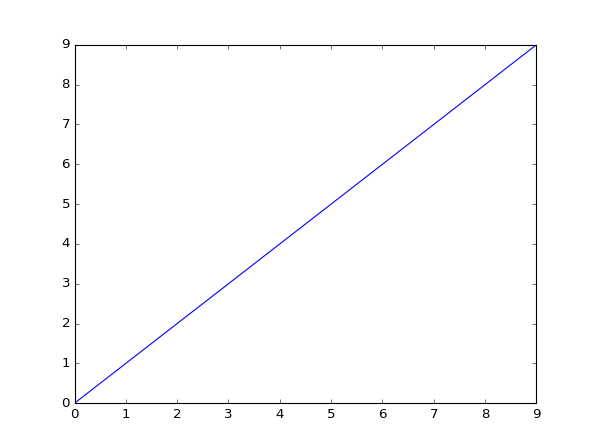

In [5]:
plt.plot(data)

seaborn和pandas内建的一些绘图函数能帮我们省去很多画图的繁杂工作，但如果我们想要定制化地做出一些函数无法绘出的图，就需要了解一些matplotlib的API了。

# 1 Figures and Subplots（图和子图）

在matplotlib中画的图，都是在Figure对象中的。可以用plt.figure创建一个：

<IPython.core.display.Javascript object>


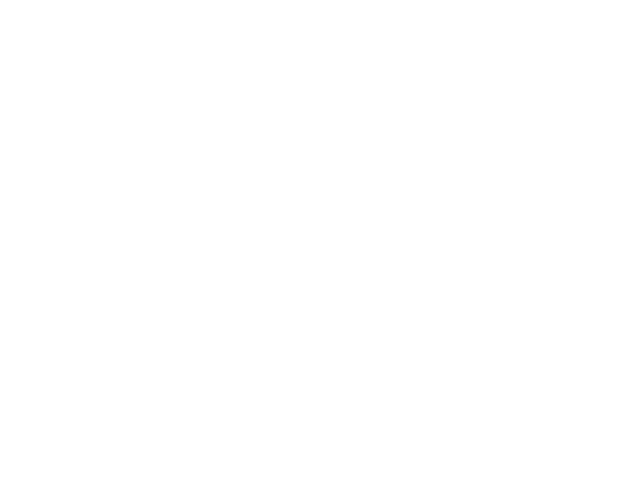

In [6]:
fig = plt.figure()

如果实在ipython里执行，可以看到一个空白的绘图窗口出现，但是在jupyter中没有任何显示，除非我们输入一些命令。plt.figure有一些选择，其中figsize保证figure有固定的大小和长宽比，这样也方便保存到磁盘中。

我们不能在一个空白的figure上绘图，必须要创建一个或更多的subplots（子图），用add_subplot:

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

这行代码的意思是，figure是2x2（这样一共有4幅图），而且我们选中4个subplots（数字从1到4）中的第1个。如果要创建另外两个子图，可以输入：

In [8]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


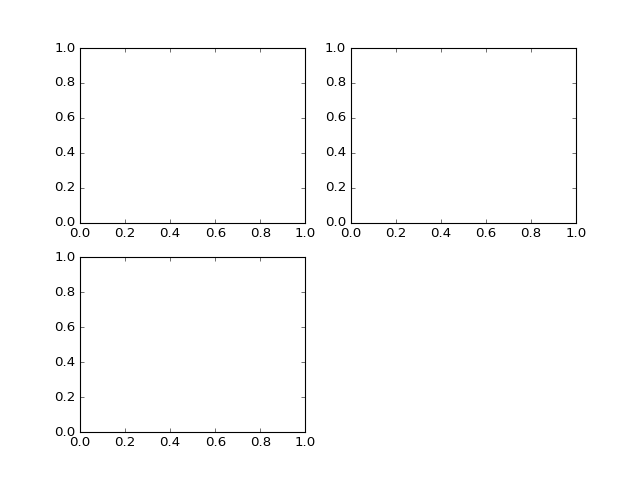

In [9]:
fig

有一个注意点，在使用Jupyter notebook的时候，绘图可能在一个cell之后被重置，所以对于一些复杂的绘图，必须把绘图命令全部放在一个notebook cell中。

这里我们在一个cell中执行这些命令：

<IPython.core.display.Javascript object>


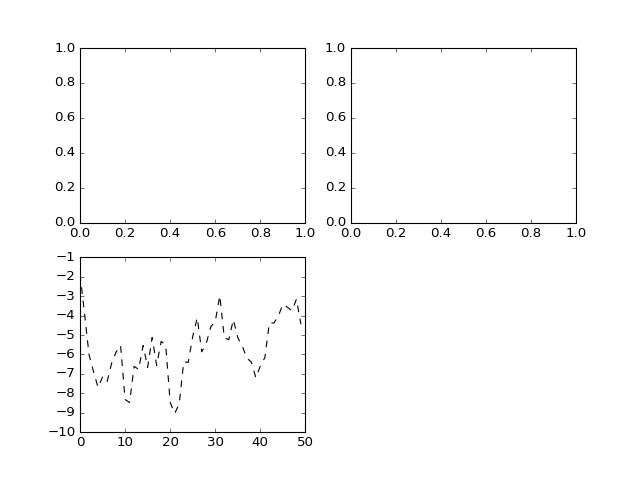

In [14]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

# 下面出现交互式界面后，不要关闭，运行之后的命令，可以看到最后一副图中出现了线

如果输入`plt.plot([1.5, 3.5, -2, 1.6])`这样的命令，matplotlib会把图画在最后一个figure的最后一个子图上。

In [15]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'是一个style（样式）选项，它表示使用黑色的虚线。在这里，fig_add_subplot返回的是一个AxesSubplot对象，我们可以直接在空白的subplot上绘图，直接在对应的AxesSubplot对象上调用方法即可：

In [16]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [18]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


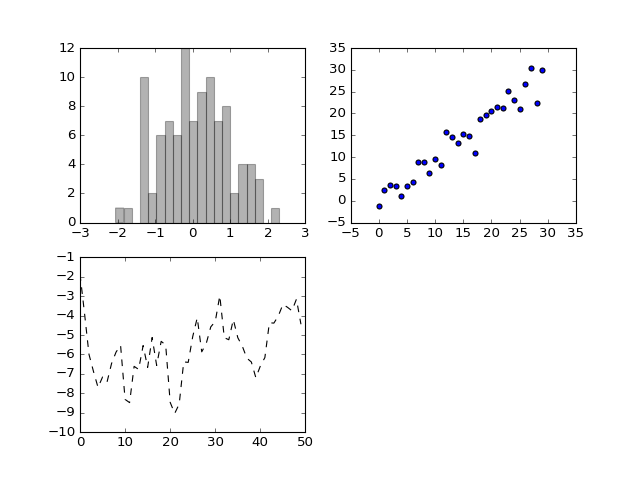

In [19]:
fig

因为创建一个带有多个subplot的figure是很常见的操作，所以matplotlib添加了一个方法，plt.subplots，来简化这个过程。这个方法会创建一个新的figure，并返回一个numpy数组，其中包含创建的subplot对象：

<IPython.core.display.Javascript object>


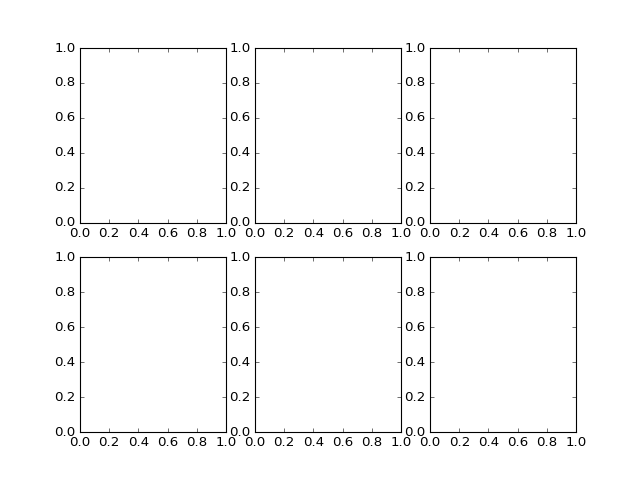

In [26]:
f, axes = plt.subplots(2, 3)

In [27]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10785b8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107f86cf8>]], dtype=object)

这个操作是很有用的。axes能用一个二位数据来索引，例如，axes[0, 1]。我们可以使用sharex和sharey来指定不同subplot有相同的x-或y-axis（其实就是令坐标轴的范围相同），这能让我们在同一范围内进行数据之间的比较。不然的话，matplotlib会自动绘图的范围不一定是一样的。下面是pyplot.subplot选项：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/ezxsc.png)

### Adjusting the spacing around subplots（调整subplot直接的间隔）

默认情况下，matplotlib会在subplot之间留下一定间隔的边距，这取决于绘图的高度和跨度。所以如果我们调整绘图的大小，它会自动调整。我们可以用Figure对象下的subplots_adjust方法来更改间隔，当然，也可以用第一层级的函数：

    subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
wspace和hspace控制figure宽度和长度的百分比，可以用来控制subplot之间的间隔。这里有一个例子，我们让间隔为0：


<IPython.core.display.Javascript object>


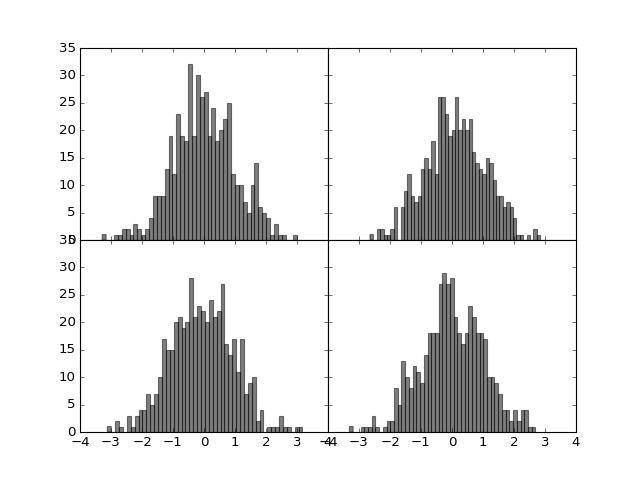

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)    

我们注意到轴上有些标签重叠了。matplotlib不会检查标签是否重叠，所以我们需要直接规定明确的tick location（记号位置）和tick labels（记号标签），这部分会在之后介绍。

# 2 Colors, Markers, and Line Styles（颜色，标记物，线样式）

matplotlib的plot主函数能接受x和y坐标，在可选项中，字符串能指定颜色和线样式。例如，画出x和y，用绿色的点线：

`ax.plot(x, y, 'g--')`

这种方法可以很方便的同时指定颜色和线样式；不过有些用户可能不喜欢直接把规定颜色和样式的字符串写在一起，当然，我们也可以写得更明确一些：

`ax.plot(x, y, linestyle='--', color='g')`

有很多可供选择的颜色缩写，当然，我们也可以使用任意的颜色，通过制定hex code(十六进制码，比如'#CECECE')。通过查看plot的字符串文档，我们可以看到可供选择的所有线样式（直接输入`plot?`）。

另外还可以用markers（标记物）来高亮实际的数据点。因为matplotlib创建一个continuous line plot（连续线条图）的话，如果想要插入，可能看不清楚哪里可以插入数据点。而marker可以作为样式的一部分，字符串必须按颜色，标记物类型，样式这样的顺序：

<IPython.core.display.Javascript object>


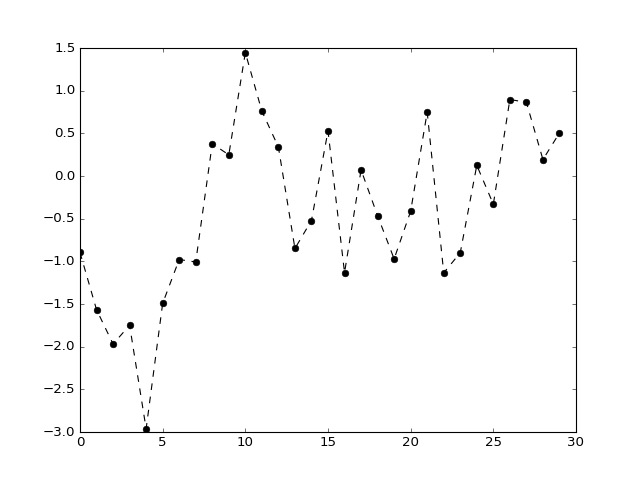

In [30]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

当然，我们也快成写得更准确一些：

<IPython.core.display.Javascript object>


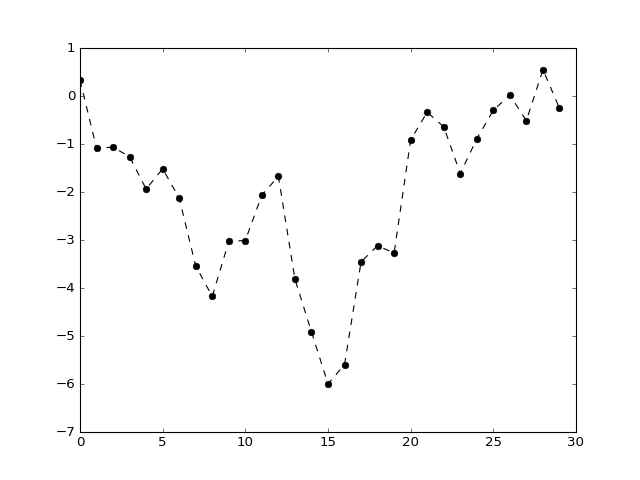

In [37]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

对于点线图，我们注意到，默认情况下，后续点是通过线性添加上的。这个可以通过drawstyle来更改：

In [33]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


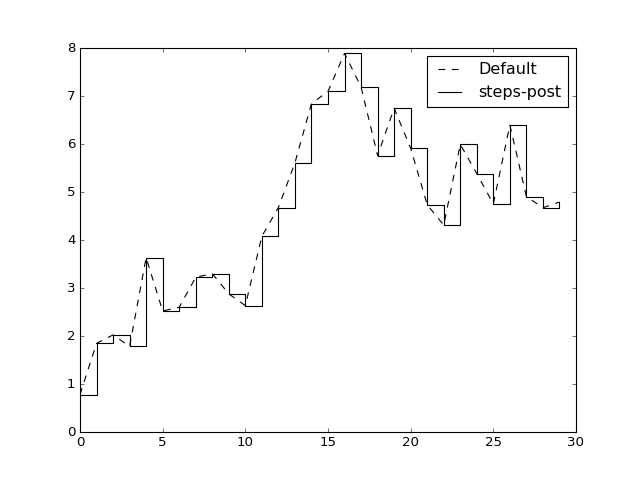

In [41]:
plt.plot(data, 'k--', label='Default') 

In [42]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [43]:
plt.legend(loc='best')

当运行上面命令时，我们注意到，输出有`<matplotlib.legend.Legend at 0x10906fda0>`这样的字样。这是matplotlib返回我们添加的那些子图的索引。大部分时候我们可以无视这种输出。这里，我们把label传递给了plot，这样通过plt.legend显示出每条线的意义。

注意：我们必须调用plt.legend（或ax.legend，如果有axes的话）来创建一个legend（图例），不论是非传入label。（译者：经测试，如果不调用plt.legend的话，是看不到label的）

# 3 Ticks, Labels, and Legends（标记，标签，图例）

对于大部分绘图的装饰，有两种主要的方法：使用pyplot（matplotlib.pyplot）和用更对象导向的简单的matplotlib API。

pyplot界面是为交互式使用而设计的，它包含很多方法，比如xlim, xticks, xticklabels。这些方法控制绘图的范围，标记位置，标记标签。有两种使用方法：

- 调用的时候不传入参数，使用当前的参数设置（例如，plt.xlim()返回当前X轴的范围）
- 调用的时候传入参数，使用传入的参数设置（例如，plt.xlim([0, 10]), 令X轴的范围从0到10）

所有这些方法，作用于激活的或最新创建的AxesSubplot对象上。每一个都在subplot有对应的两个方法；比如对于xlim，就有对应的ax.get_xlim和ax.set_xlim。这里作者使用subplot的方法，这样会更清晰。

### Setting the title, axis labels, ticks, and ticklabels（设定标题，轴标签，标记，标记标签）

这里创建一个简单的图，画一个随机漫步：

<IPython.core.display.Javascript object>


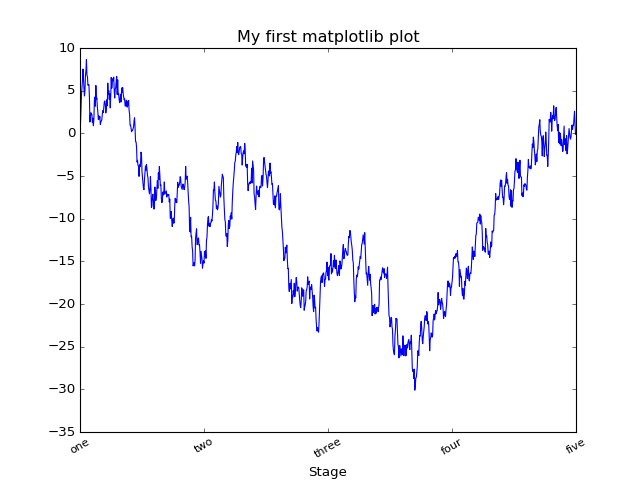

In [44]:
fig = plt.figure() # 直到下一个黑体标题出现前，不要关闭这个fig

In [45]:
ax = fig.add_subplot(1, 1, 1)

In [46]:
ax.plot(np.random.randn(1000).cumsum())

为了改变x-axis tick（x轴标记），使用set_xticks和set_xticklabels。前者告诉matplotlib沿着x轴的范围，把标记放在哪里；默认会把所在位置作为标签，但我们可以用set_xticklabels来设置任意值作为标签：

In [47]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [48]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

rotation选项让x轴上的标记标签有一个30度的旋转。set_xlabel给x轴一个名字，而set_title给subplot一个标题：

In [49]:
ax.set_title('My first matplotlib plot')

In [50]:
ax.set_xlabel('Stages')

用相同的流程来更改y轴，把上面代码里的x变为y。axes类有一个set方法，能让我们一次设置很多绘图特性。对于上面的例子，我们可以写成下面这样：

In [51]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stage'
}

ax.set(**props)

[<matplotlib.text.Text at 0x10a4b6eb8>, <matplotlib.text.Text at 0x10a552160>]

### Adding legends （添加图例）

图例对于绘图很重要。有很多方式可以添加图例。最简单的方法是用label参数：

In [7]:
from numpy.random import randn

<IPython.core.display.Javascript object>


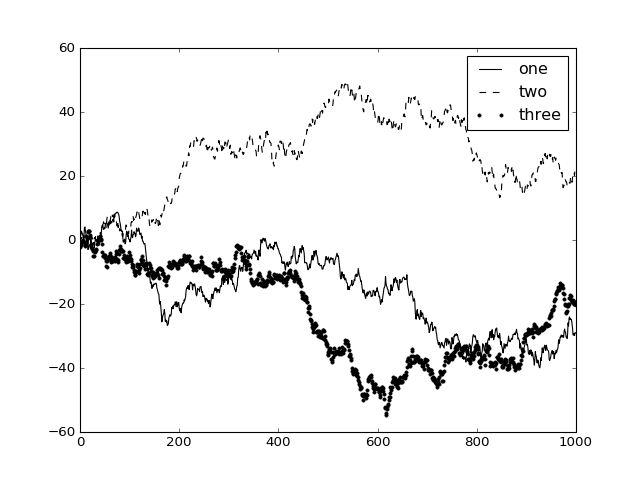

In [53]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [54]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [55]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [56]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

做完了上面的部分，调用ax.legend()或plt.legend()，来自动创建图例：

In [58]:
ax.legend(loc='best')

legend方法有一些选项，比如用loc参数设定位置。更多信息，可以参考字符串文档（ax.legend?）

loc告诉matplotlib把图例放在哪里。如果不挑剔的话，直接设定'best'就可以了，它会自动选择一个合适的位置。如果想要从图例中排除一个或更多的元素，那就不要传入label，或设置`label='_nolegen_'`。

# 4 Annotations and Drawing on a Subplot（注释和在subplot上画图）

除了标准的绘图类型，我们可能希望画出自己的绘图注释，包括文本，箭头或其他形状。我们可以添加注释和文本，通过text，arrow，和annotate函数。text能在指定的坐标(x, y)上写出文本，还可以自己设定样式：

`ax.test(x, y, 'Hello world!', family='monospace', fontsize=10)`

注释可以画出文本和箭头。这里我们做一个例子，画出S&P 500指数自2007年后的价格，并用注释指出在2008~2009年经融危机期间一些重要的日期。

下面的内容可以在一个cell里直接执行：

<IPython.core.display.Javascript object>


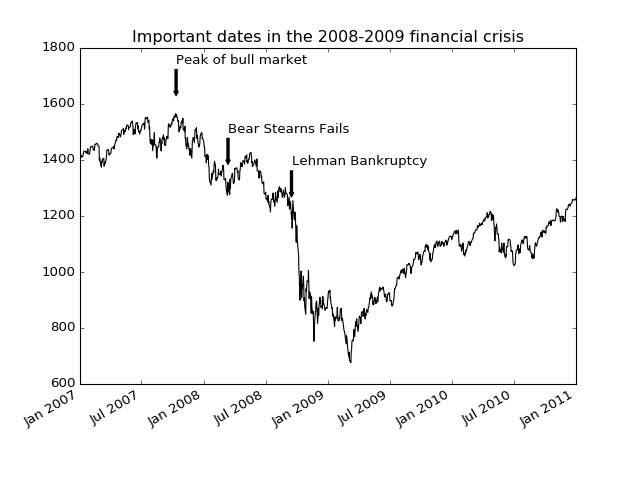

In [12]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, 
                                width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

在这幅图里，有一些点是值得强调的：ax.annotate方法能在x和y坐标指示的位置画出标签。我们可以用set_xlim和set_ylim方法来手动地设置开始和结束的边界，而不是用matplotlib的默认边界。最后，ax.set_title添加一个主标题。

可以联网看matplotlib gallery上查看更多关于标注的例子。

要想画出图形的话，更需要细心一些。matplotlib有一些对象可以用来表示一些常见的图形，被称之为patches。其中一些，比如Rectangle和Circle，在matplotlib.pyplot也有，但是全套画图形的方法还是在matplotlib.patches里。

给图中添加一个图形，必须先添加一个patch对象，shp，然后通过调用ax.add_patch(shp)把它添加到subplot中：

<IPython.core.display.Javascript object>


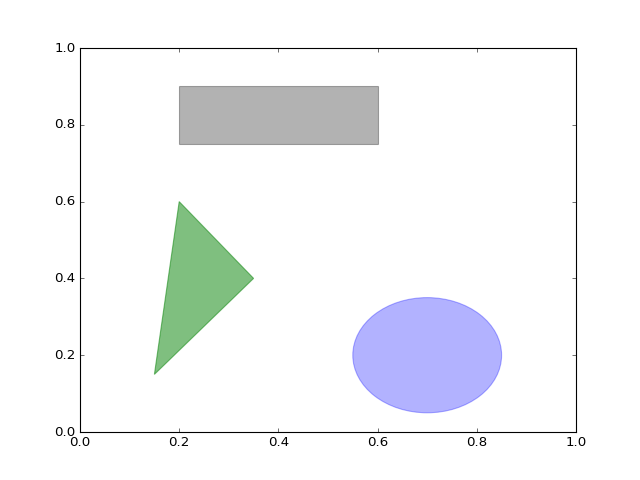

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 5 Saving Plots to File（把图保存为文件）

我们可以用plt.savefig来保存图。这个方法等同于直接在figure对象上调用savefig方法。例如，想要保存一个SVG版本的图片，键入：

    `plt.savefig('figpath.svg)`

保存的文件类型通过文件名后缀来指定。即如果使用 .pdf做为后缀，就会得到一个PDF文件。这里有一些重要的设置，作者经常用来刊印图片：

- dpi，控制每英寸长度上的分辨率
- bbox_inches, 能删除figure周围的空白部分

比如我们想要得到一幅PNG图，有最小的空白，400 DPI，键入：

    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
    
savefig不仅可以写入磁盘，还可以导出为任意像是文件一样的对象，比如BytesIO：

    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()

看下图关于savefig更多的选项：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/xc0am.png)

# 6 matplotlib Configuration（matplotlib设置）

matplotlib很多默认的设置是可以自己定义的，通过修改一些全局设定，比如图大小，subplot间隔，颜色，字体大小，网格样式等等。一种更累设定的方式是用rc方法，例如，想要设置全局的图大小为10 x 10，键入：

    plt.rc('figure', figsize=(10, 10))
    
rc中的第一个参数是我们想要自定义的组件，比如'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'，或其他。然后添加一个关键字来设定新的参数。一个比较方便的写法是把所有的设定写成一个dict：

    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size'  : 'small'}
    plt.rc('font', **font_options)
    
更详细的设定可以去看一下文档，matplotlib影城而设置文件*matplotlibrc*，位于*matplotlib/mlp-data*文件夹下。如果按自己的方式修改这个文件，并把这个文件放在主目录下，更名为*.matplotlibrc*的话，在每次启动matplotlib的时候，会自动加载这个文件。